# 드롭아웃


In [ ]:
import tensorflow_datasets as tfds
import tensorflow as tf

In [ ]:
(train_data, test_data), info = tfds.load(
    'imdb_reviews/subwords8k',
    split = (tfds.Split.TRAIN, tfds.Split.TEST),
    with_info=True, as_supervised=True
    )

# padded_batch :
# 배치에서 가장 긴 문자열의 길이를 기준으로 시퀀스를 0으로 채움
padded_shapes = ([None], ())
train_batches = train_data.shuffle(1000).padded_batch(10, padded_shapes=padded_shapes)
test_batches = test_data.shuffle(1000).padded_batch(10, padded_shapes=padded_shapes)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incomplete3539RR/imdb_reviews-train.tfrecord


  0%|          | 0/25000 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incomplete3539RR/imdb_reviews-test.tfrecord


  0%|          | 0/25000 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incomplete3539RR/imdb_reviews-unsupervised.tfrecord


  0%|          | 0/50000 [00:00<?, ? examples/s]

Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0. Subsequent calls will reuse this data.


In [ ]:
# iter는 반복 가능한 객체에서 이터레이터를 반환하고, next는 이터레이터에서 값을 차례대로 꺼냄
train_batch, train_labels = next(iter(train_batches))
train_batch.numpy()

array([[2680,  630,   14, ...,    0,    0,    0],
       [  19, 3634,   12, ...,    0,    0,    0],
       [  12,   31,   33, ...,    0,    0,    0],
       ...,
       [6346, 7961,    7, ...,    0,    0,    0],
       [1284,  554, 6136, ..., 5623, 1644, 7975],
       [2080,   75,   77, ...,    0,    0,    0]])

In [ ]:
# 드롭아웃이 적용되지 않은 모델
encoder = info.features['text'].encoder
model = tf.keras.Sequential([

# 임베딩층
# 단어당 하나의 베터 저장, 임베딩이 호출되면 단어 인덱스 시퀀스를 벡터 시퀀스로 변환
tf.keras.layers.Embedding(encoder.vocab_size, 64),
tf.keras.layers.LSTM(64),
tf.keras.layers.Dense(64, activation='relu'),
tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
# 컴파일
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(1e-4), metrics=['accuracy'])
history = model.fit(train_batches, epochs=5, validation_data=test_batches,
                    validation_steps=30)

Epoch 1/5
2500/2500 [==============================] - 272s 106ms/step - loss: 0.6931 - accuracy: 0.4994 - val_loss: 0.6925 - val_accuracy: 0.4933
Epoch 2/5
2500/2500 [==============================] - 255s 102ms/step - loss: 0.6888 - accuracy: 0.5161 - val_loss: 0.6881 - val_accuracy: 0.4967
Epoch 3/5
2500/2500 [==============================] - 250s 100ms/step - loss: 0.6590 - accuracy: 0.5914 - val_loss: 0.6443 - val_accuracy: 0.6700
Epoch 4/5
2500/2500 [==============================] - 248s 99ms/step - loss: 0.6091 - accuracy: 0.6914 - val_loss: 0.5907 - val_accuracy: 0.7600
Epoch 5/5
2500/2500 [==============================] - 252s 101ms/step - loss: 0.6752 - accuracy: 0.5282 - val_loss: 0.6828 - val_accuracy: 0.5000


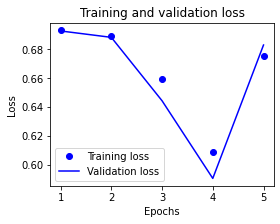

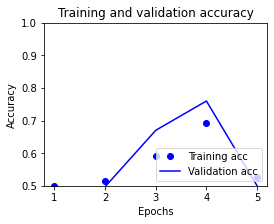

In [ ]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64
train_dataset = train_batches.shuffle(BUFFER_SIZE)
import matplotlib.pyplot as plt
history_dict = history.history 
acc = history_dict['accuracy'] 
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = range(1, len(acc)+1) 
plt.figure(figsize=(4,3))
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.figure(figsize=(4,3))
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim((0.5,1))
plt.show()

결과

- 검증에 대한 손실이 네 번째 에포크에서 다시 높아짐
- 정상적이지 않음

In [ ]:
model = tf.keras.Sequential([
tf.keras.layers.Embedding(encoder.vocab_size, 64),

# 양방향 RNN 사용
tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
tf.keras.layers.Dense(64, activation='relu'),
tf.keras.layers.Dropout(0.5),
tf.keras.layers.Dense(1, activation='sigmoid')
])
model.summary()

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(1e-4), metrics=['accuracy'])
history = model.fit(train_batches, epochs=5, validation_data=test_batches,
                    validation_steps=30)

In [ ]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64
train_dataset = train_batches.shuffle(BUFFER_SIZE)
import matplotlib.pyplot as plt
history_dict = history.history
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = range(1, len(acc)+1)
plt.figure(figsize=(4,3))
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.figure(figsize=(4,3))
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim((0.5,1))
plt.show()